In [3]:
import jax.numpy as np
import matplotlib.pyplot as plt

from xpinn import XPINN
from utils import data_path, model_path, fig_path
import plotutils
from NavierStokes_utils.model_predict import NSpredict


In [4]:
activation = np.tanh


NoDecomp_file_test = data_path / "NavierStokes" / "test_NoDecomp.json"
TwoBoxDecomp_file_test = data_path / "NavierStokes" / "test_TwoBoxDecomp.json"

xpinnTwoBox = XPINN(TwoBoxDecomp_file_test, activation)
single_pinn = XPINN(NoDecomp_file_test, activation)


## Model paths

No decomp models

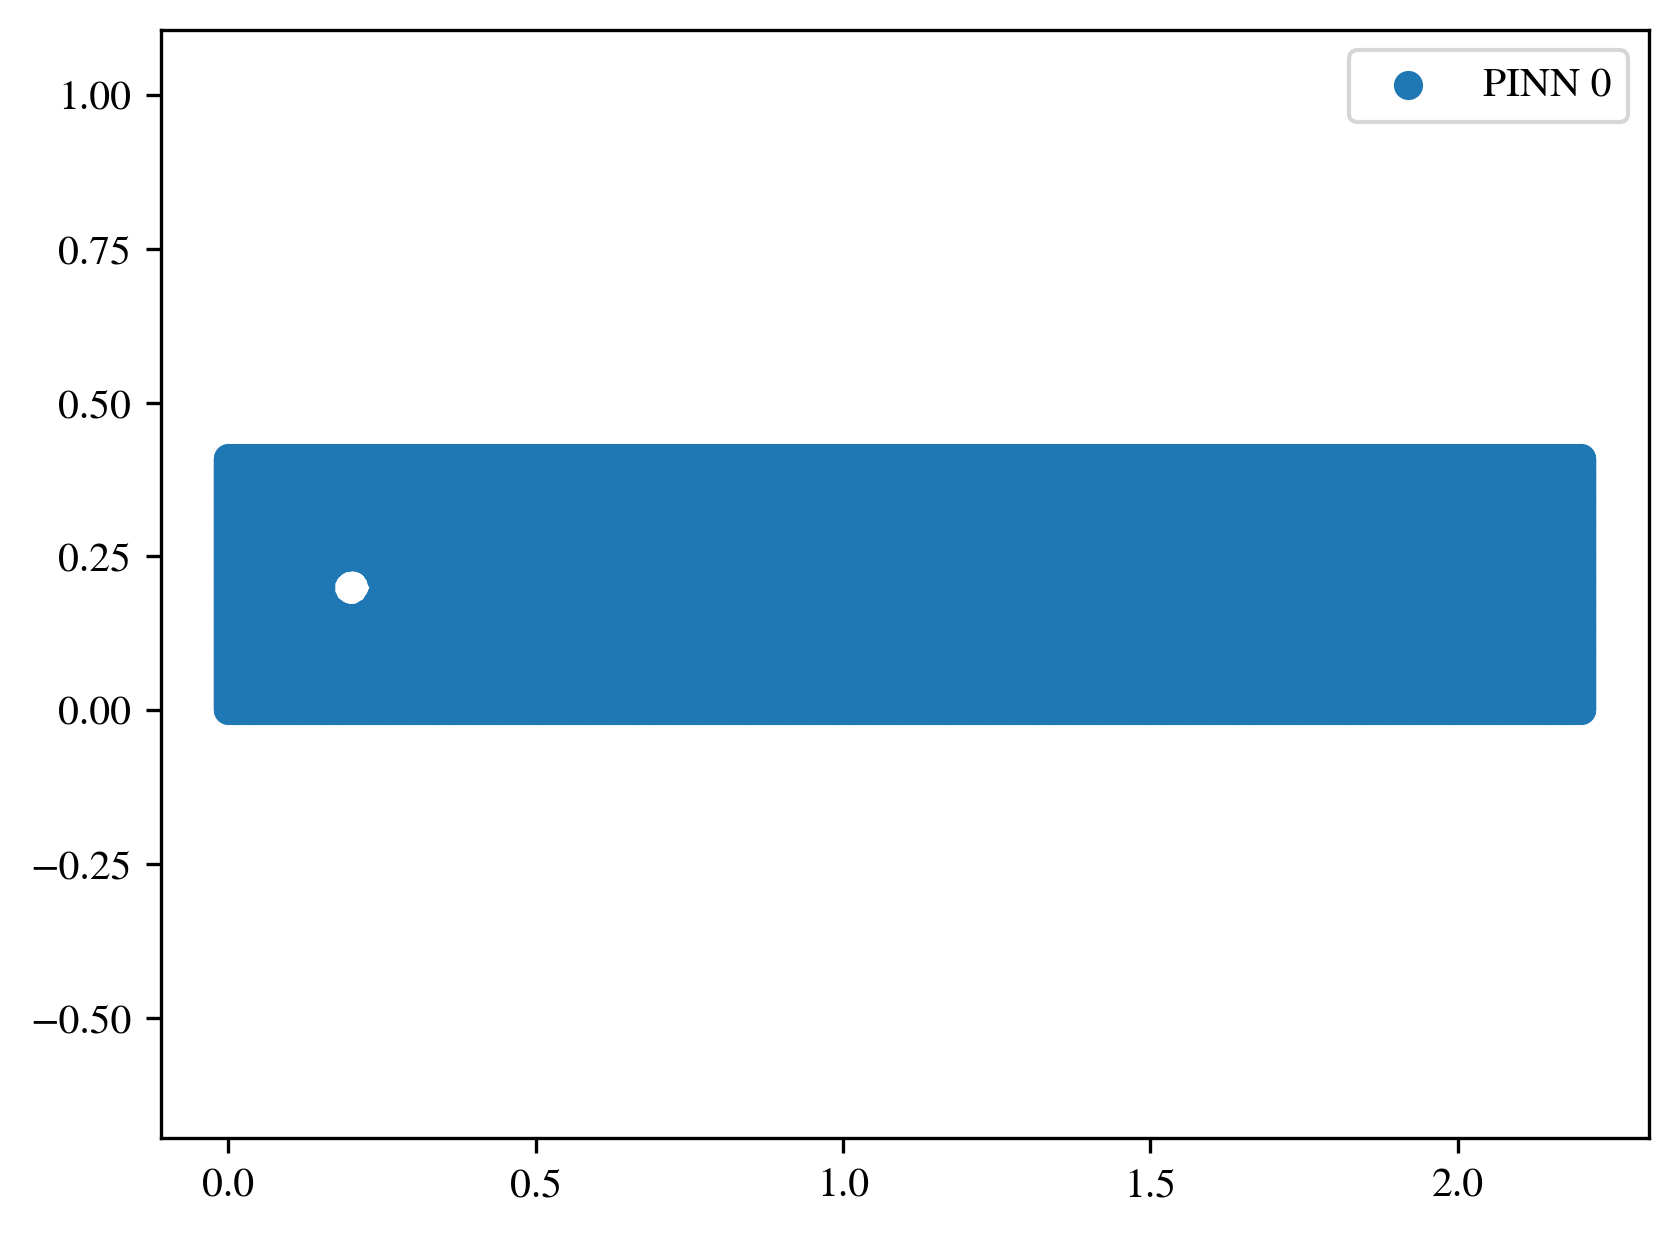

In [5]:
%matplotlib inline

plt.axis("equal"
)

for i, pinn in enumerate(single_pinn.PINNs):
    checkout = pinn.interior
    plt.scatter(checkout[:, 0], checkout[:, 1], label=f"PINN {i}")

plt.legend()


In [6]:
no_decomp_path = model_path / "NavierStokes" / "single_pinn" / "laminar"


#models\NavierStokes\single_pinn\laminar\Adam_20000_iter_7layer_model0
ND_adam_20000_iter_good_model = no_decomp_path / "Adam_20000_iter_7layer_model0"

#models\NavierStokes\single_pinn\laminar\10000_iter_30x25_good
ND_10000_iter_30x25 = no_decomp_path / "10000_iter_30x25_good"


### Decomp models

#### Two box decomp 

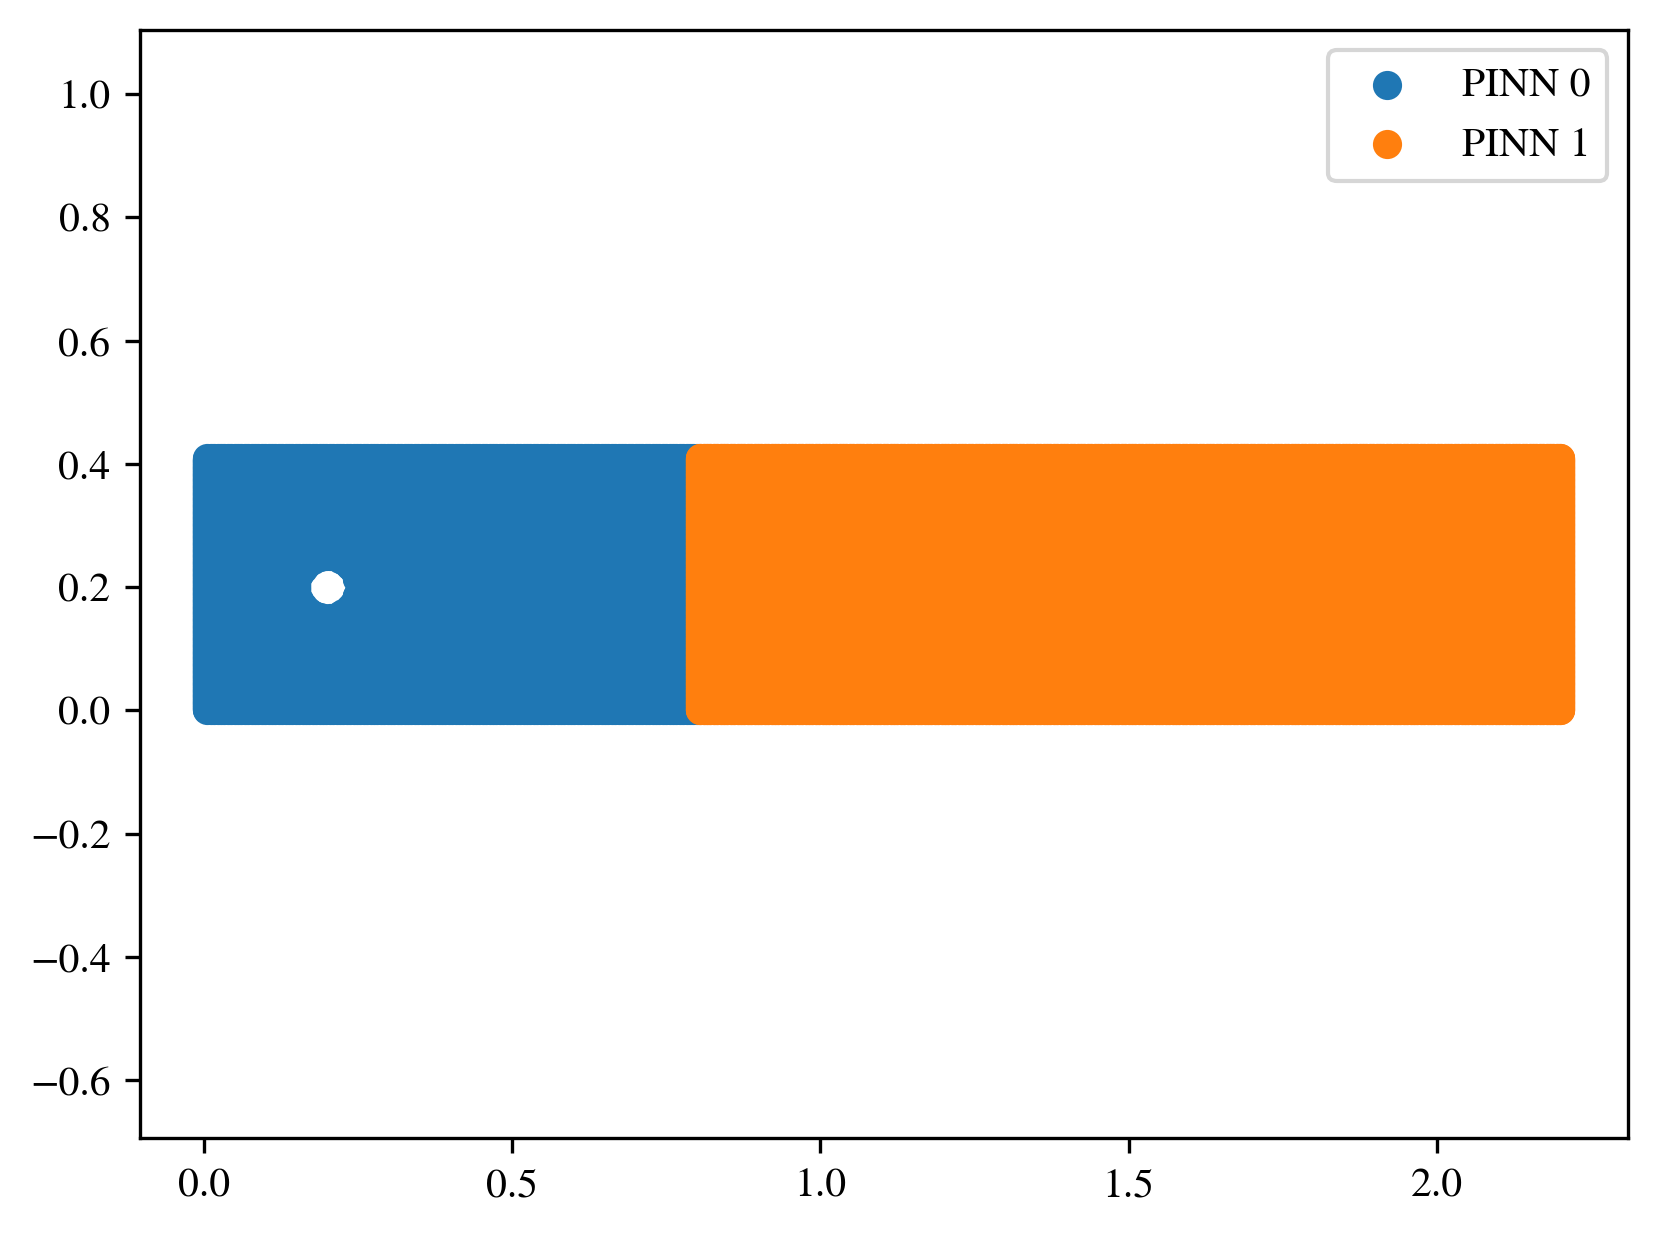

In [7]:
%matplotlib inline

plt.axis("equal"
)

for i, pinn in enumerate(xpinnTwoBox.PINNs):
    checkout = pinn.interior
    plt.scatter(checkout[:, 0], checkout[:, 1], label=f"PINN {i}")

plt.legend()

Two box model paths

In [8]:
two_box_model_path = model_path / "NavierStokes" / "Decomp_2"


#models\NavierStokes\Decomp_2\laminar_decomp_train_400_2100_v2_1.0_1.0_1.0_iterations=10000_Neumann
TB_10000_iter_Neumann = two_box_model_path / "laminar_decomp_train_400_2100_v2_1.0_1.0_1.0_iterations=10000_Neumann"


#models\NavierStokes\Decomp_2\right_emphasis_400_2100_1.0_1.0_1.0_10000_iter
TB_10000_iter_right_emphasis = two_box_model_path / "right_emphasis_400_2100_1.0_1.0_1.0_10000_iter"





#### Load prefered models

In [9]:

#Change these and run cells if you want to load a different model
#single_pinn_model = ND_adam_20000_iter_9layer
single_pinn_model = ND_10000_iter_30x25



#TwoBox_model = TB_10000_iter_Neumann
TwoBox_model = TB_10000_iter_right_emphasis

#single_pinn_model_str = "ND_adam_20000_iter_9layer"
single_pinn_model_str = "ND_10000_iter_30x25"


#TwoBox_model_str = "TB_10000_iter_500_5000_20_20"
#TwoBox_model_str = "TB_10000_iter_500_5000_20_40"
#TwoBox_model_str = "TB_10000_iter_500_5000"
#TwoBox_model_str = "TB_10000_iter_20_inflow_wall_weight_40"
#TwoBox_model_str = "TB_10000_iter_Neumann"
TwoBox_model_str = "TB_10000_iter_right_emphasis"




In [10]:

single_pinn.load_model(single_pinn_model)



xpinnTwoBox.load_model(TwoBox_model)

#### Losses

In [11]:
save_path_NoDecomp = fig_path / "NavierStokes" / "NoDecomp"/ f"{single_pinn_model_str}" / "losses"
save_path_TBDecomp = fig_path / "NavierStokes" / "TwoBoxDecomp"/ f"{TwoBox_model_str}" / "losses"



# XPINNtitle = "XPINN solution"
# PINNtitle = "PINN solution"

PINNlossTitle = "PINN losses over 10 000 iterations"
TwoBoxlossTitle = "XPINN losses over 10 000 iterations"


save_path_NoDecomp.mkdir(parents=True, exist_ok=True)
save_path_TBDecomp.mkdir(parents=True, exist_ok=True)

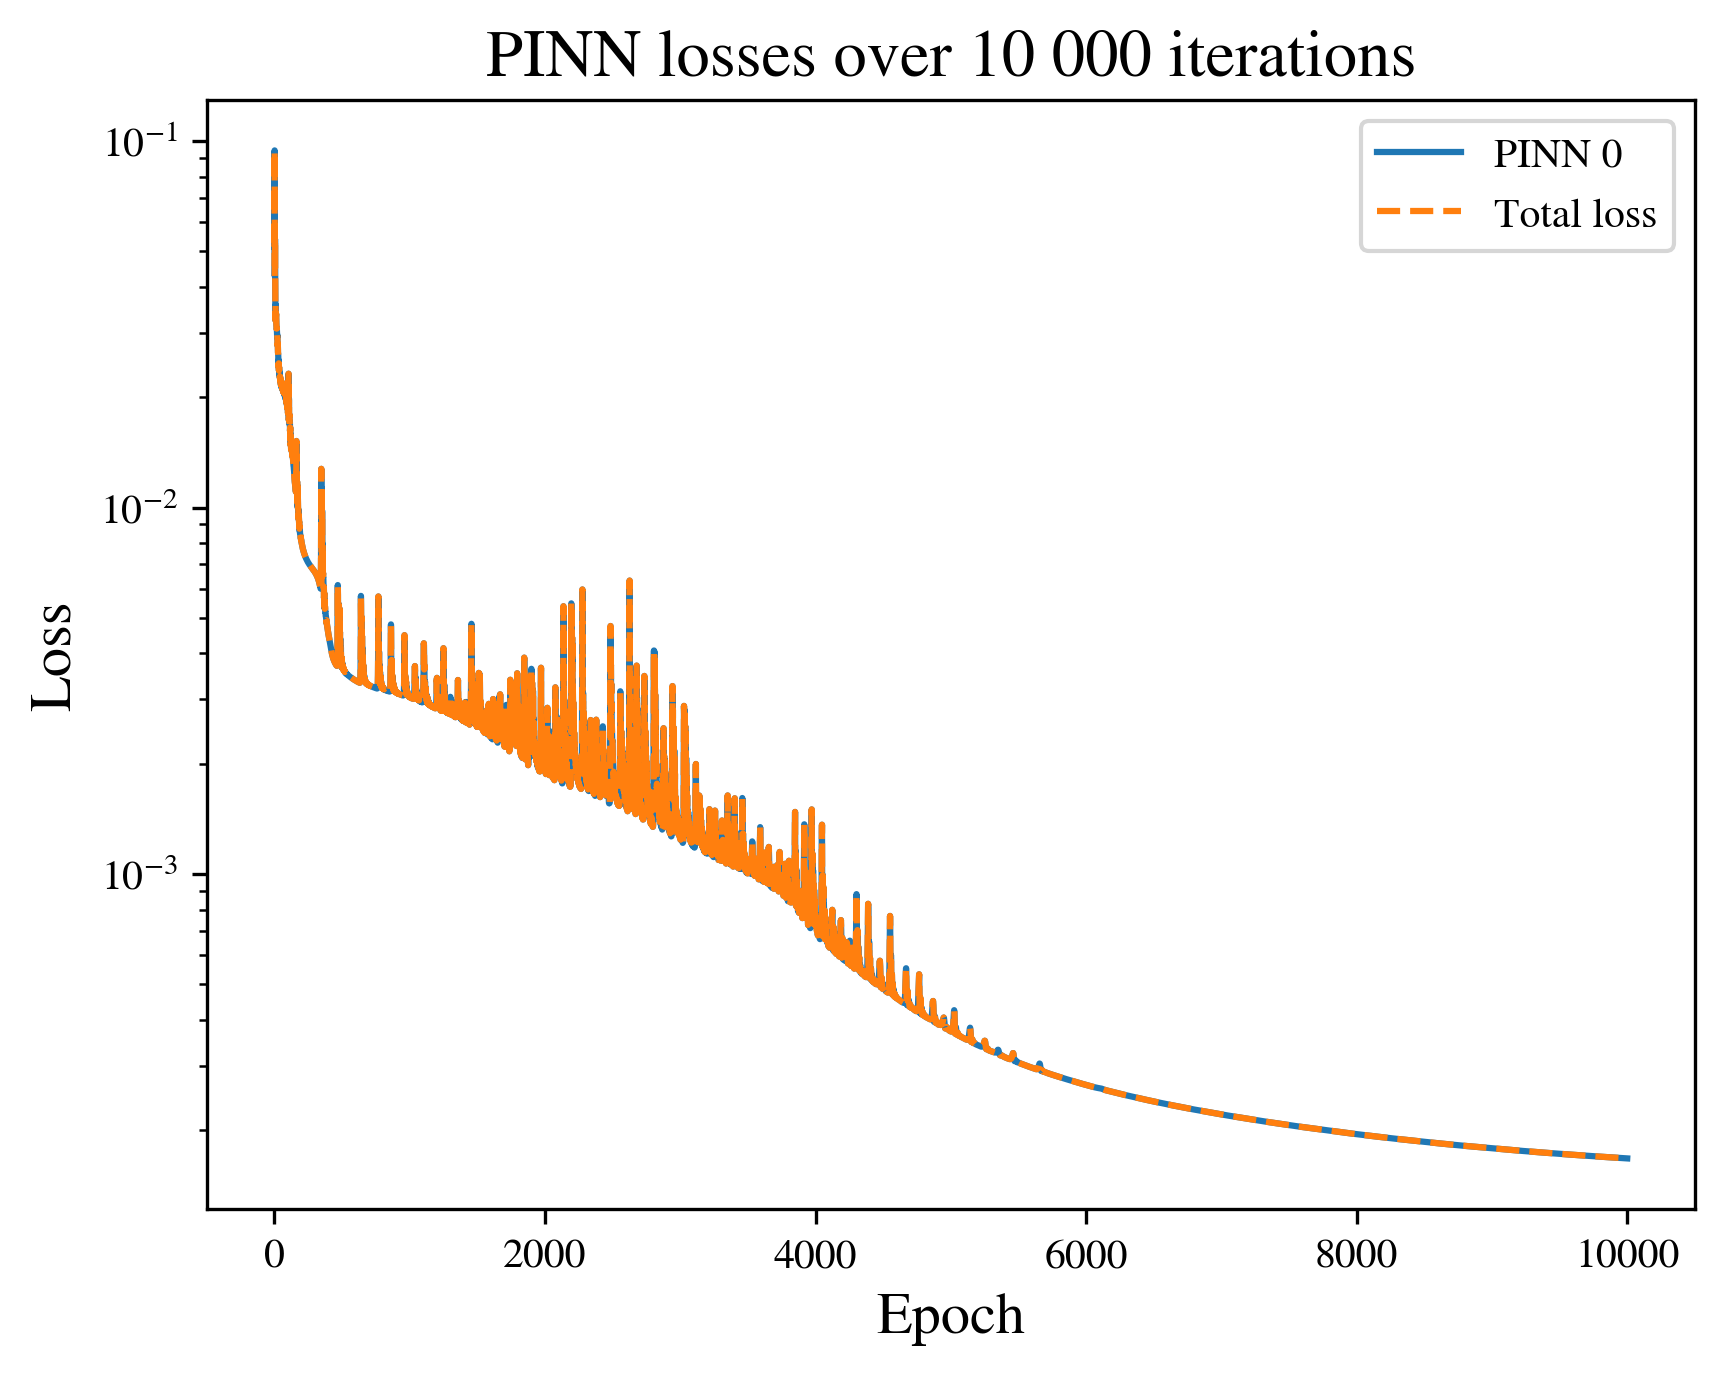

In [12]:
plotutils.plot_losses(
    a_losses=single_pinn.losses,
    n_iter=10000,
    title=PINNlossTitle,
    savepath=save_path_NoDecomp,
    save_name=f"PINN_losses",
)

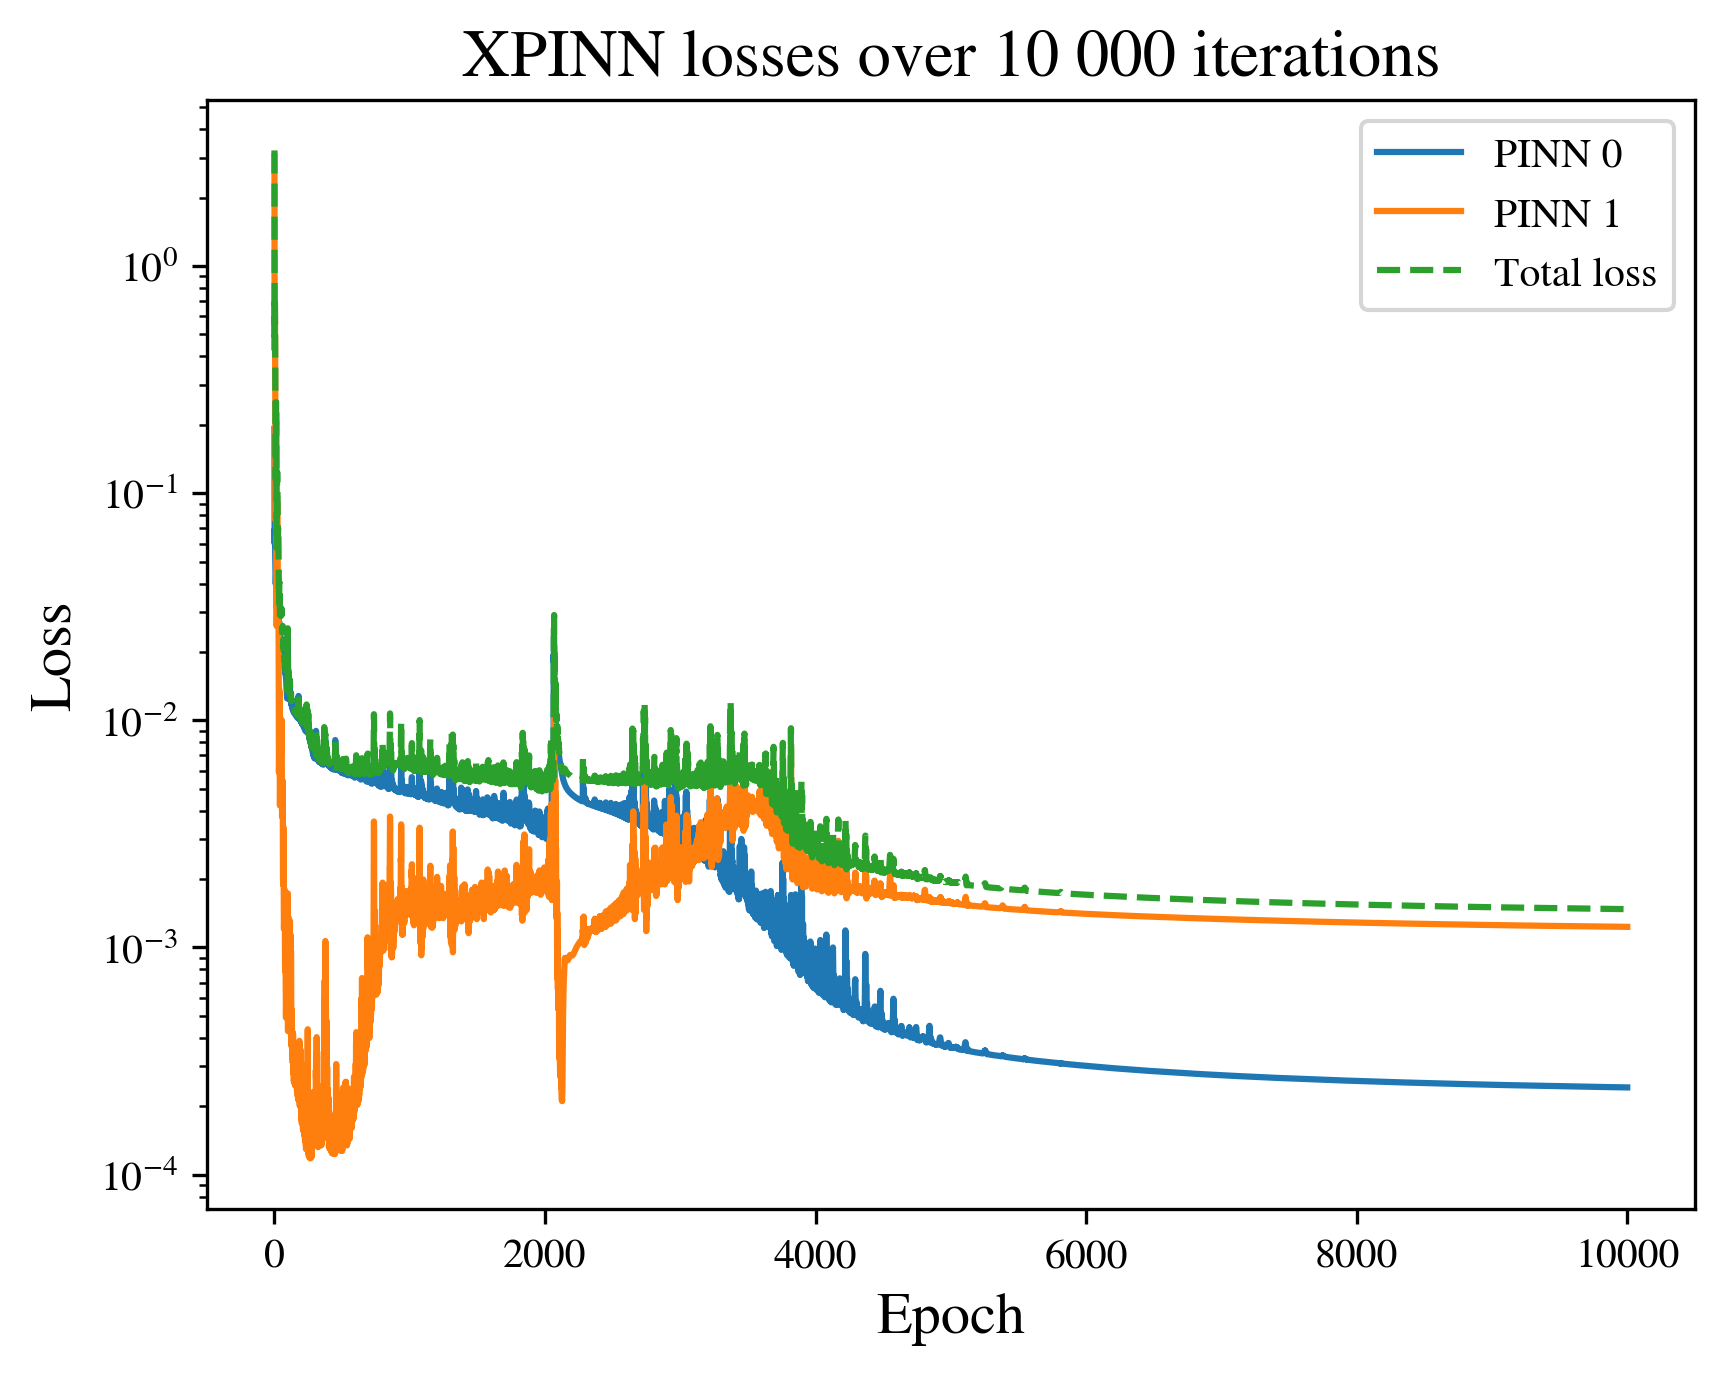

In [13]:
plotutils.plot_losses(
    a_losses=xpinnTwoBox.losses,
    n_iter=10000,
    title=TwoBoxlossTitle,
    savepath=save_path_TBDecomp,
    save_name=f"TwoBox_decomp_losses",
)

### Navier Stokes results

Savepaths and names for single pinn navier stokes results

In [14]:
No_decomp_solution_save_path = fig_path / "NavierStokes" / "NoDecomp" / f"{single_pinn_model_str}" / "solution"


#create_path
No_decomp_solution_save_path.mkdir(parents=True, exist_ok=True)

In [15]:
points, flow, flow_magitude, pressure, streamfunction = NSpredict(single_pinn, NoDecomp_file_test)

In [16]:
tot_points = np.concatenate(points)

In [17]:
"""
def plot_navier_stokes(
    points: Array,
    val: Array,
    title: str,
    savepath: Path,
    save_name: str,
    clim: tuple = None,
):
"""

'\ndef plot_navier_stokes(\n    points: Array,\n    val: Array,\n    title: str,\n    savepath: Path,\n    save_name: str,\n    clim: tuple = None,\n):\n'

In [18]:
# clim_bench_flow = [0, 0.405]
# clim_bench_pressure = [0.0115, 0.131]
# clim_stram = [0.0396, 0.0424]

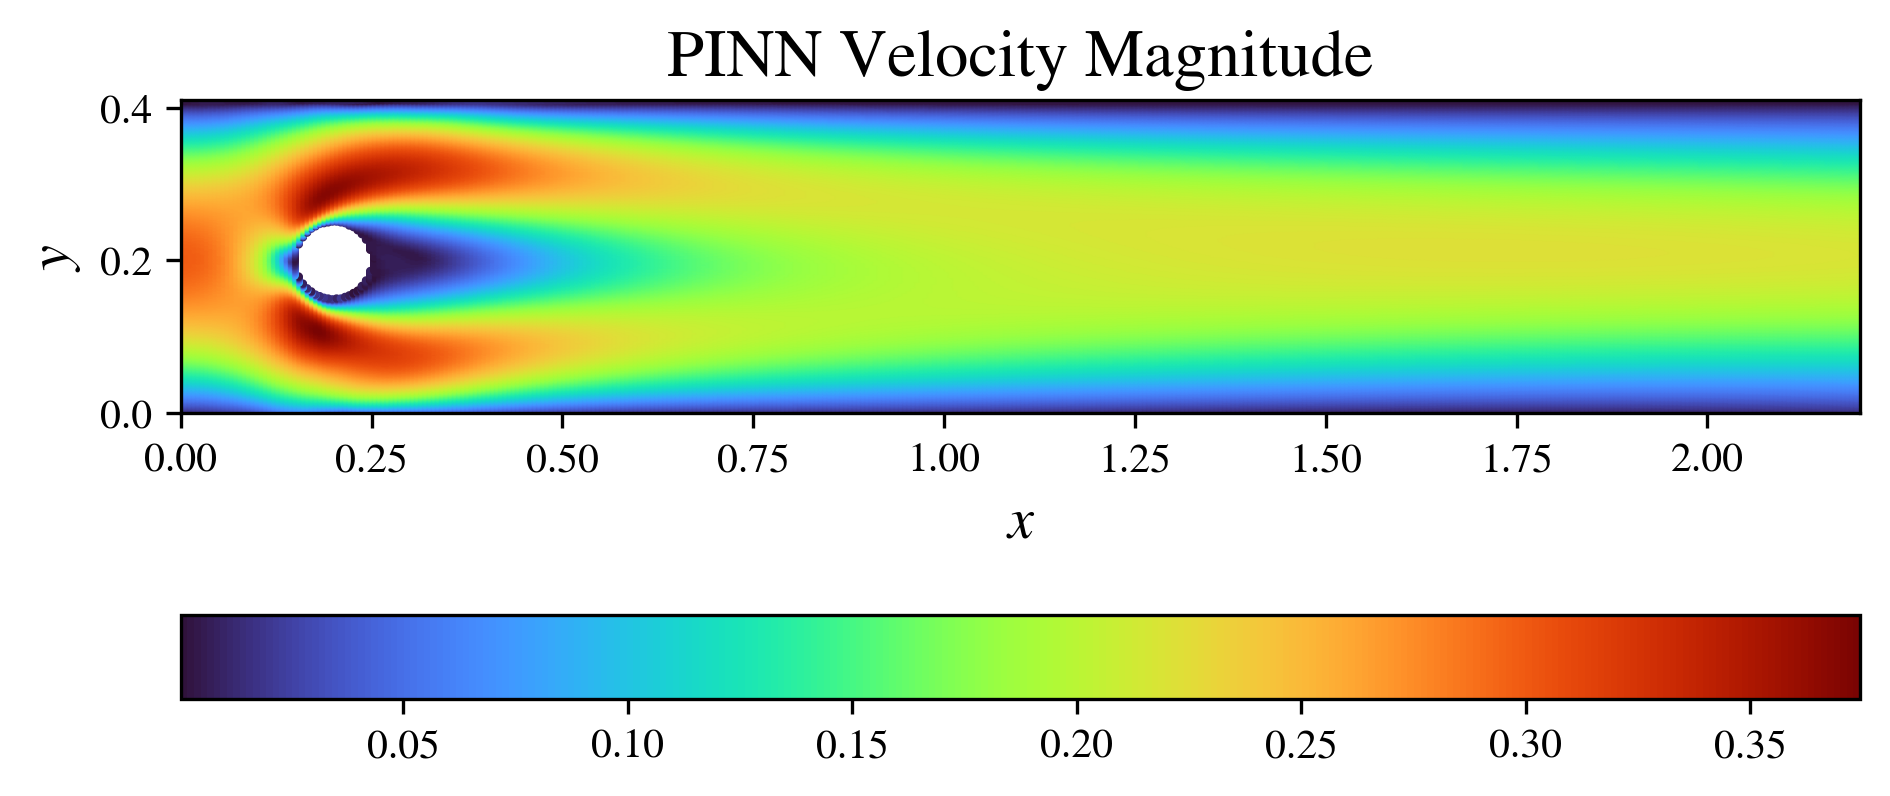

In [19]:
tot_flow = np.concatenate(flow_magitude)
clim_flow = (tot_flow.min(), tot_flow.max())

plotutils.plot_navier_stokes(
    tot_points, 
    tot_flow,  
    No_decomp_solution_save_path, 
    "flow_magnitude_no_decomp",
      clim=clim_flow,
)

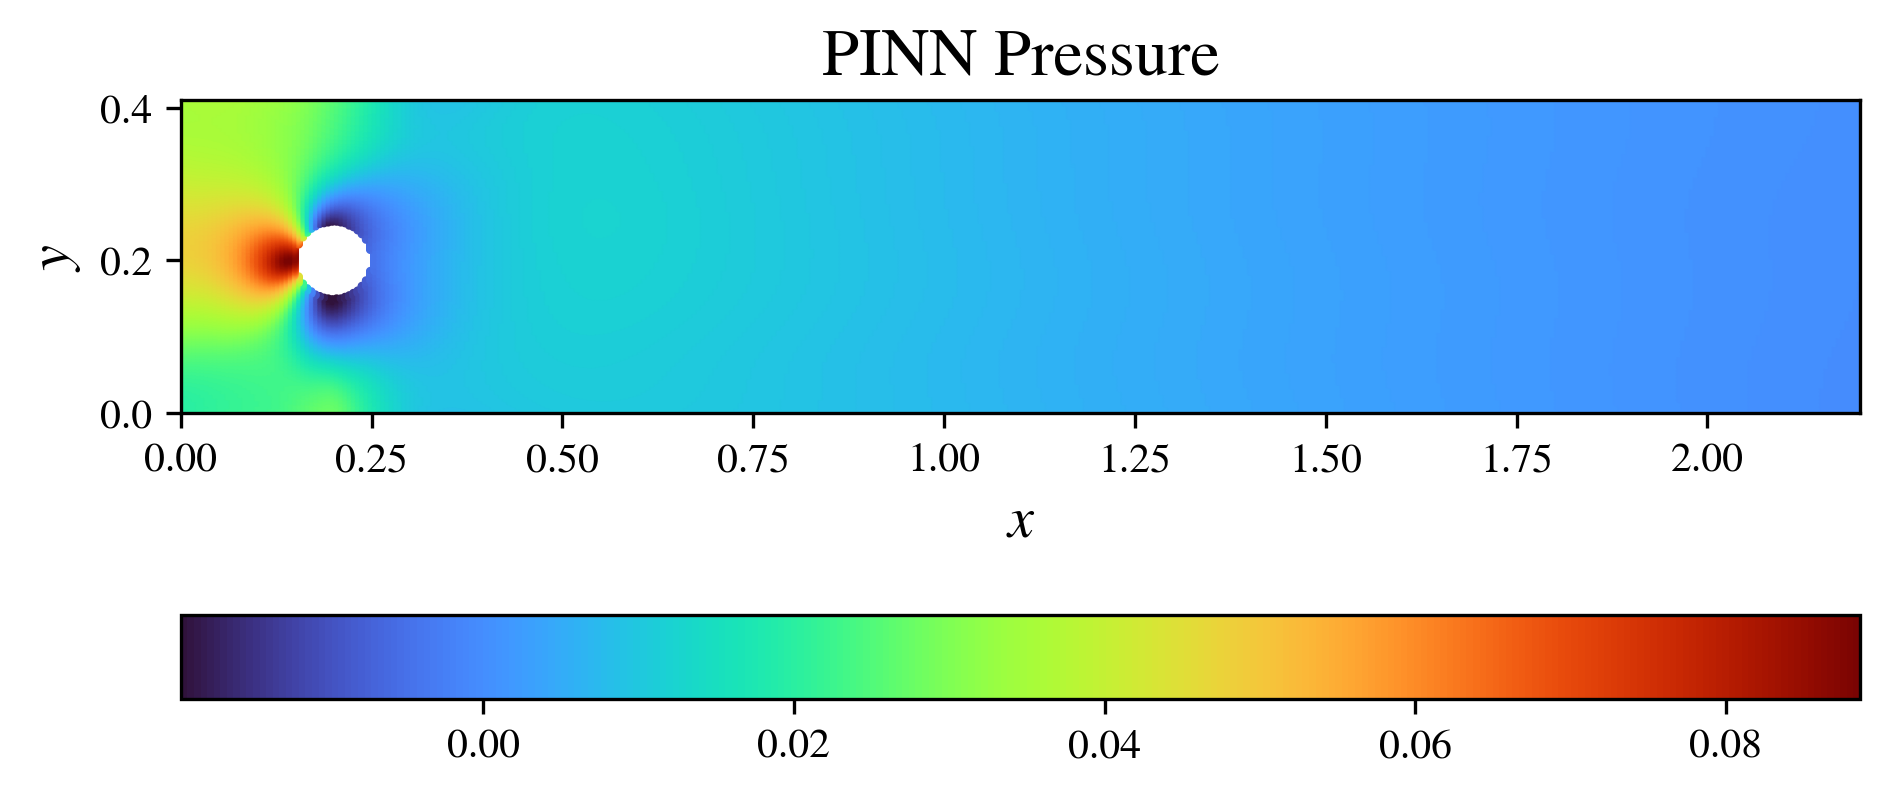

In [20]:
tot_pressure = np.concatenate(pressure)
clim_pressure = (tot_pressure.min(), tot_pressure.max())

plotutils.plot_navier_stokes(
    tot_points, 
    tot_pressure, 
    No_decomp_solution_save_path, 
    "pressure_no_decomp",
    clim = clim_pressure,
)

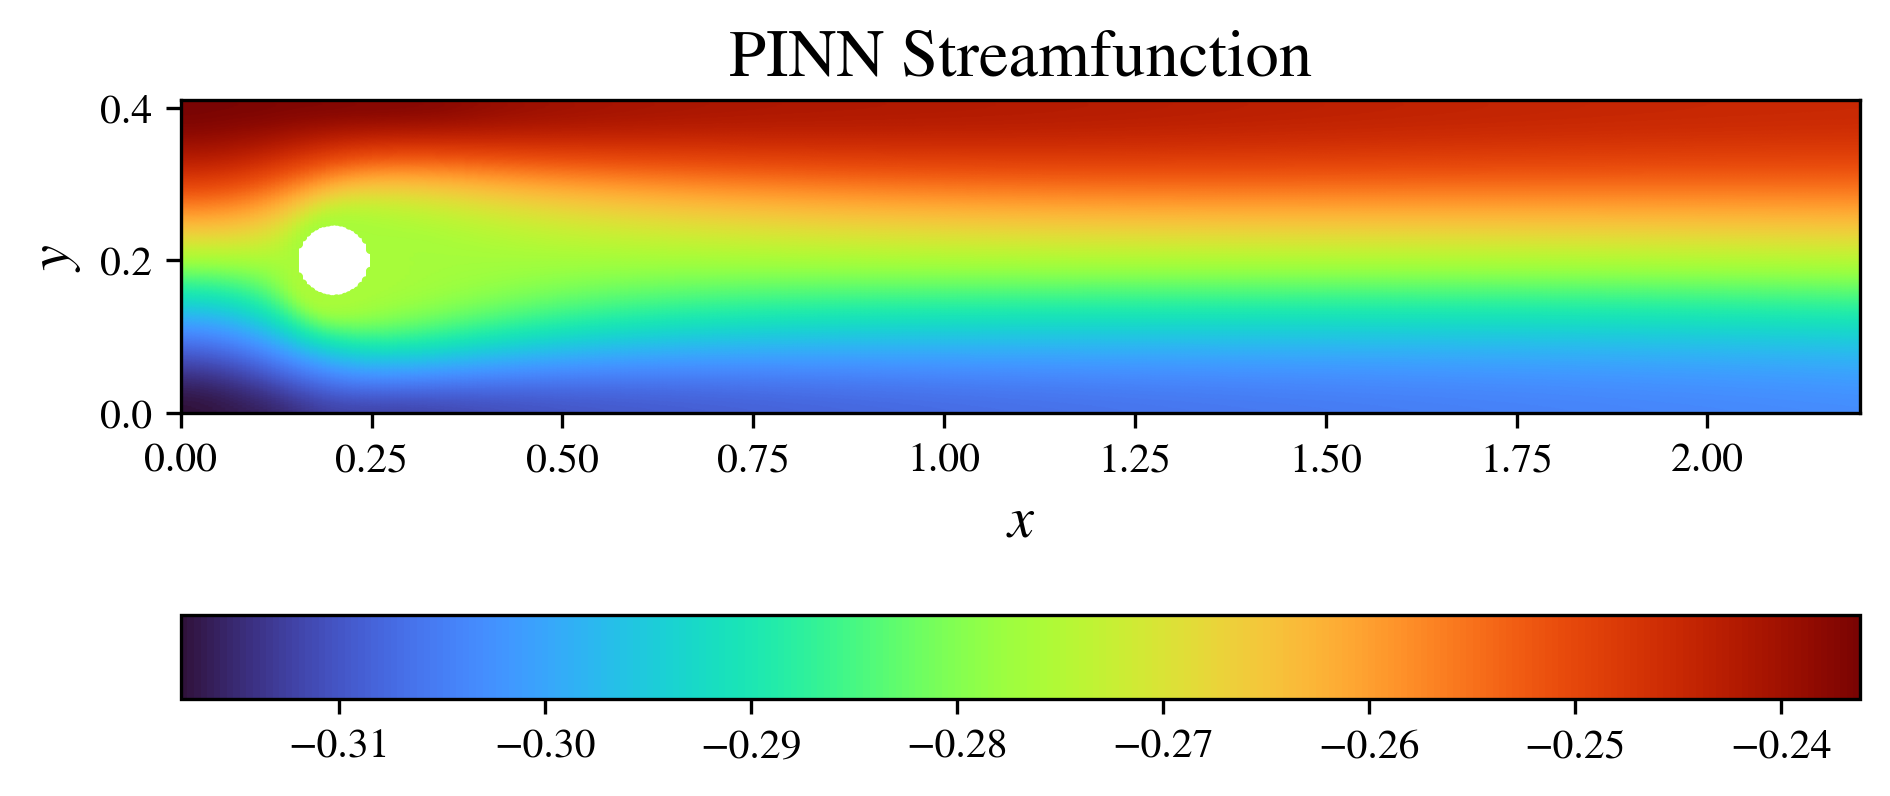

In [21]:
tot_streamfunction = np.concatenate(streamfunction)
clim_stream = (tot_streamfunction.min(), tot_streamfunction.max())

plotutils.plot_navier_stokes(
    tot_points, 
    tot_streamfunction,  
    No_decomp_solution_save_path, 
    "streamfunc_no_decomp",
    clim = clim_stream,
)

## Important numerical quantities PINN

In [22]:
from numerical_quantities import drag_lift_coefficients, pressure_diff

params = single_pinn.PINNs[0].params

drag, lift = drag_lift_coefficients(params, nu=0.001, n_points=1000)
pressure_diffs = pressure_diff(params)
print(f"Drag: {drag}, Lift: {lift}, Pressure difference: {pressure_diffs}")

Drag: 4.068662878125905, Lift: -0.25420158635824913, Pressure difference: 0.0890926867723465


In [23]:
points, flow, flow_magitude, pressure, streamfunction = NSpredict(xpinnTwoBox, TwoBoxDecomp_file_test)

In [24]:
tot_points_x = np.concatenate(points)

Two box decomp save paths

In [25]:
two_box_solution_save_path = fig_path / "NavierStokes" / "TwoBoxDecomp" / f"{TwoBox_model_str}" / "solution"


#make paths
two_box_solution_save_path.mkdir(parents=True, exist_ok=True)

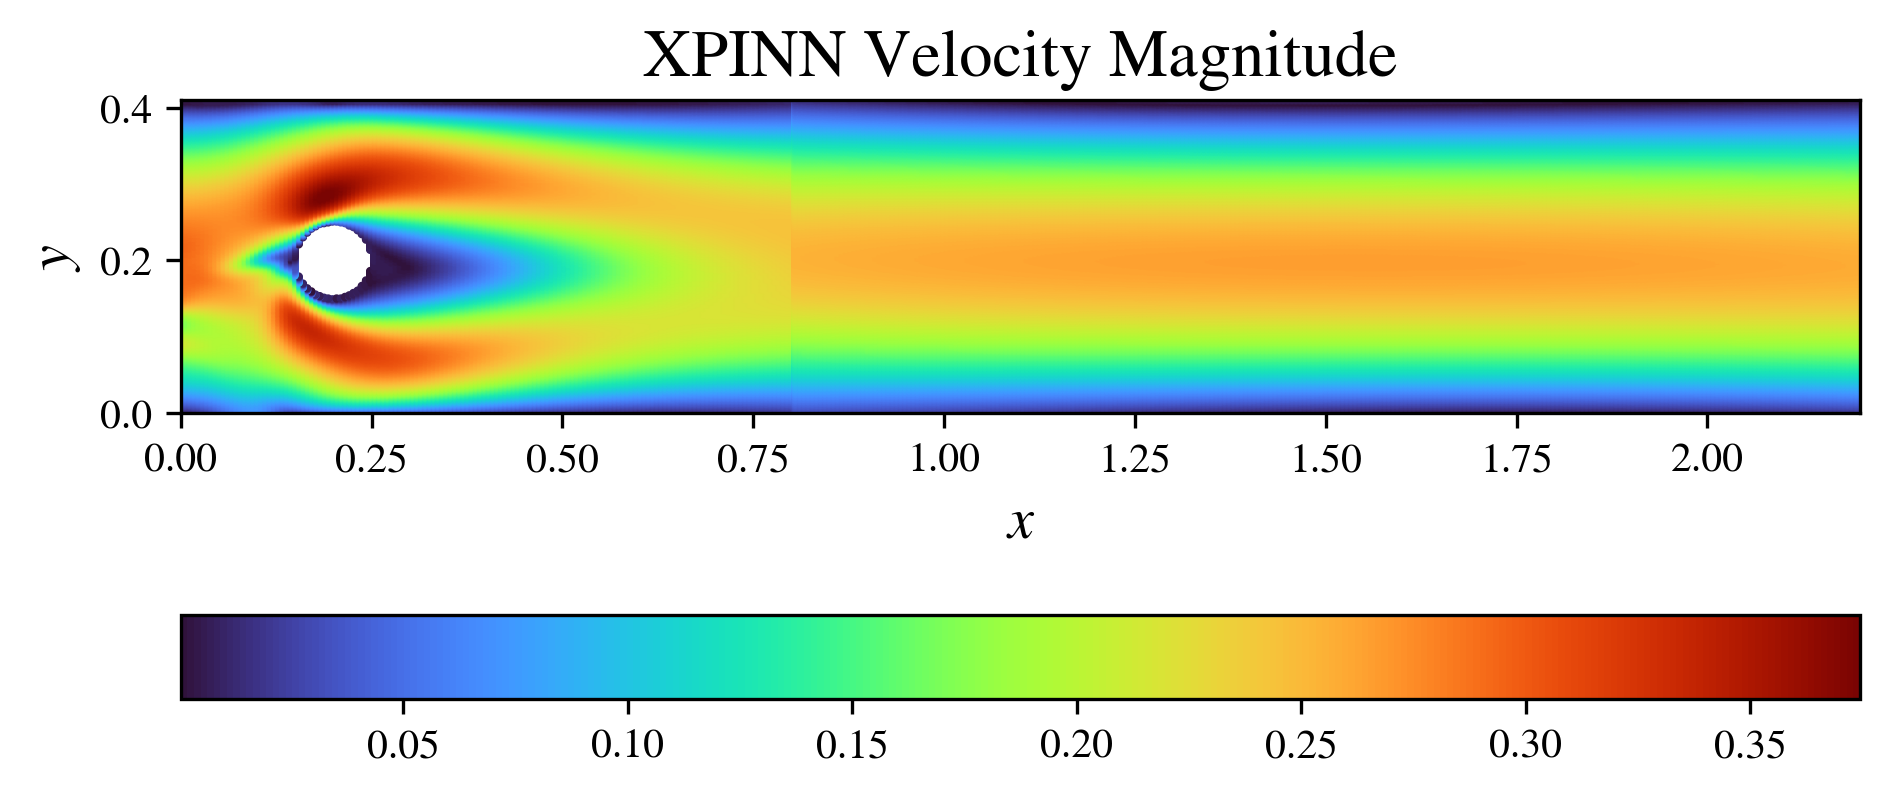

In [26]:
tot_flow_x = np.concatenate(flow_magitude)
clim_flow_x = (tot_flow_x.min(), tot_flow_x.max())

plotutils.plot_navier_stokes(
    tot_points_x, 
    tot_flow_x, 
    two_box_solution_save_path, 
    "flow_magnitude_two_box",
    clim = clim_flow,
)

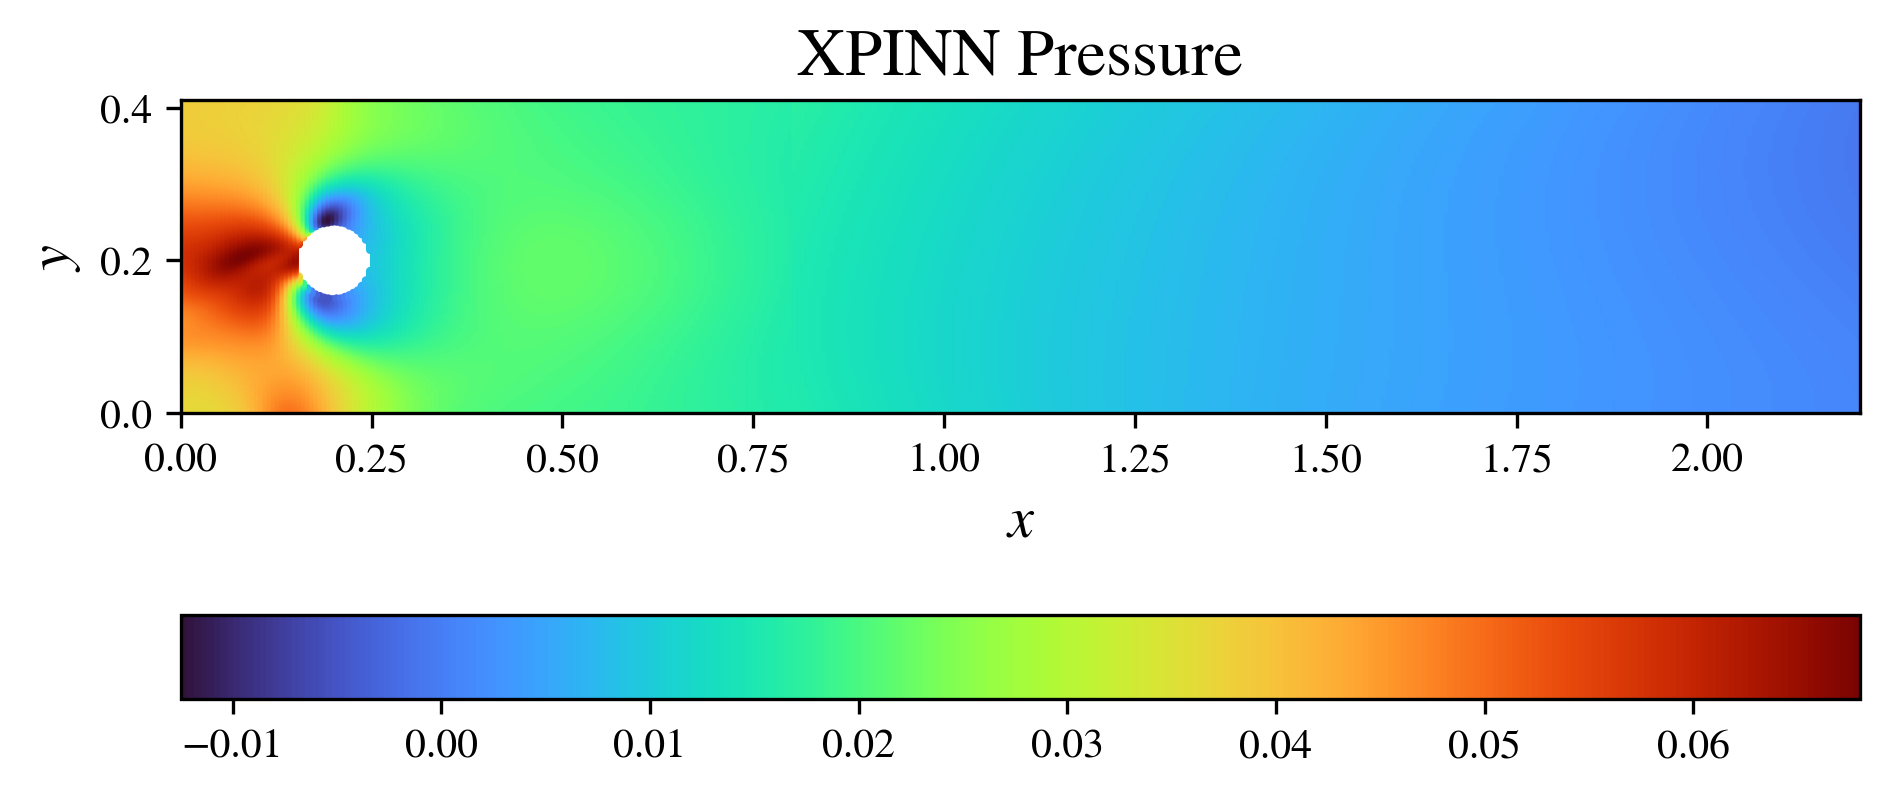

In [27]:
tot_pressure_x = np.concatenate(pressure)
clim_pressure = (tot_pressure_x.min(), tot_pressure_x.max())

plotutils.plot_navier_stokes(
    tot_points_x, 
    tot_pressure_x, 
    two_box_solution_save_path, 
    "pressure_two_box",
    clim = clim_pressure,
)

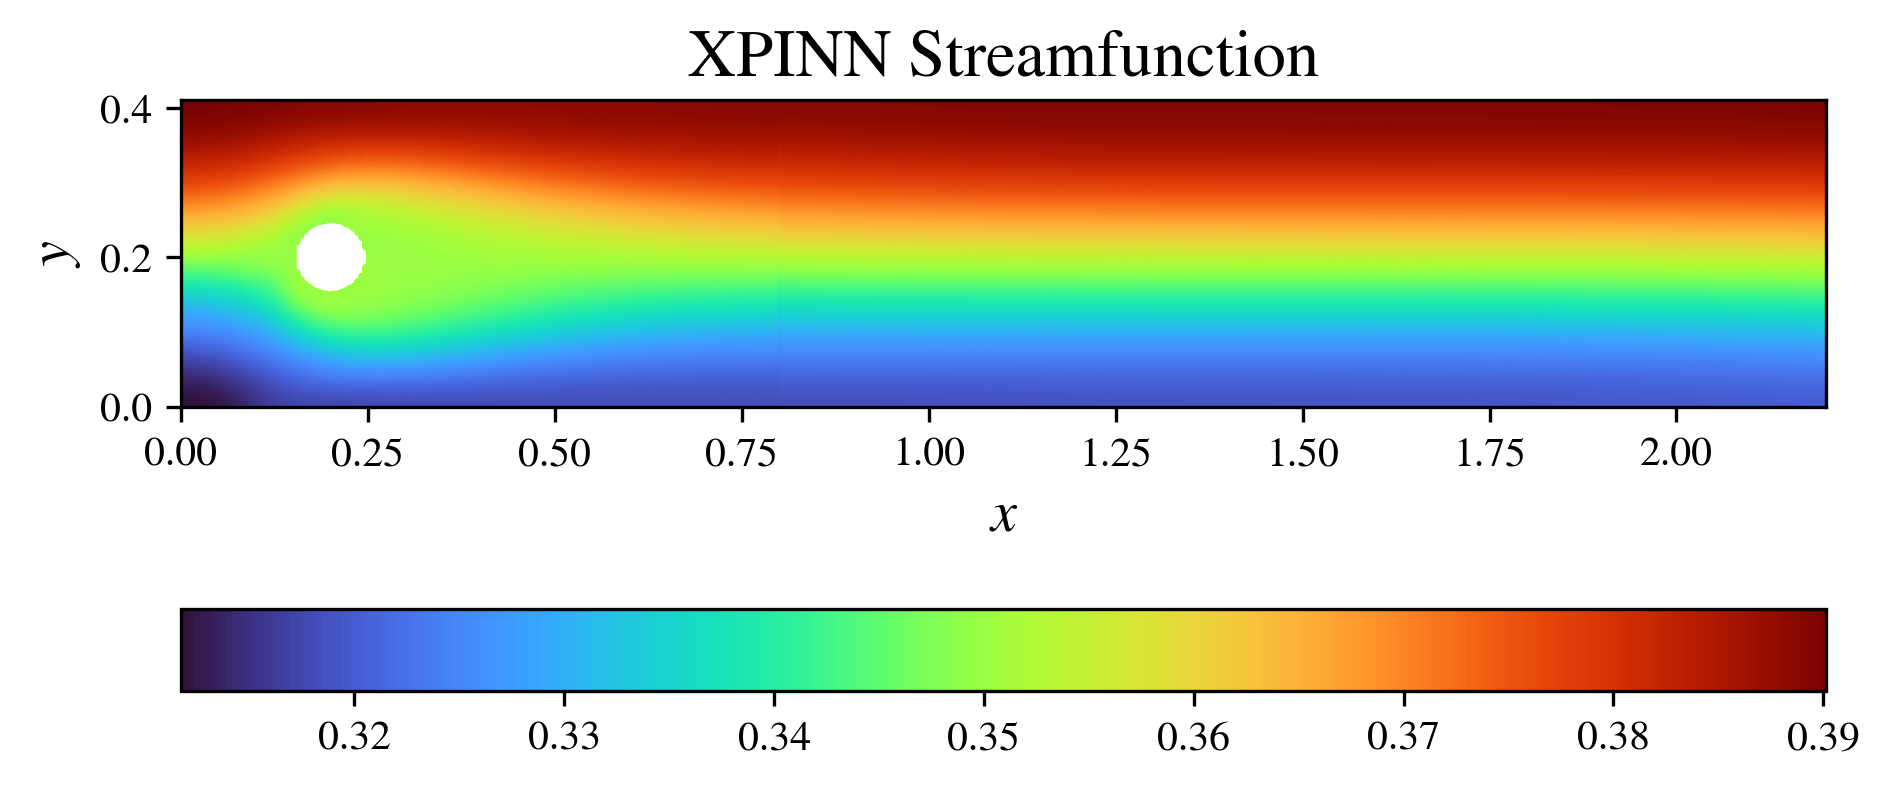

In [28]:
tot_streamfunction_x = np.concatenate(streamfunction)
clim_stream = (tot_streamfunction_x.min(), tot_streamfunction_x.max())

plotutils.plot_navier_stokes(
    tot_points_x, 
    tot_streamfunction_x, 
    two_box_solution_save_path, 
    "streamfunc_two_box",
    clim = clim_stream,

)

### Important numerical quantities XPINN

In [29]:

params = xpinnTwoBox.PINNs[0].params

drag, lift = drag_lift_coefficients(params, nu=0.001, n_points=1000)
pressure_diffs = pressure_diff(params)


In [30]:
print(f"Drag: {drag}, Lift: {lift}, Pressure difference: {pressure_diffs}")

Drag: 2.7481615543365474, Lift: -0.3368000616319477, Pressure difference: 0.05565206706523895
